# Load Data

In [1]:
n = 100
text = (open("data/sonnets.txt").read())
text = text.lower()
length = len(text)
seq_length = n

for i in range(0, length - seq_length, 100):
        sequence = text[i:i + seq_length]
        print(i)
        print(sequence)

0
﻿i

 from fairest creatures we desire increase,
 that thereby beauty's rose might never die,
 but as
100
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to 
200
thine own bright eyes,
 feed'st thy light's flame with self-substantial fuel,
 making a famine where
300
 abundance lies,
 thy self thy foe, to thy sweet self too cruel:
 thou that art now the world's fres
400
h ornament,
 and only herald to the gaudy spring,
 within thine own bud buriest thy content,
 and te
500
nder churl mak'st waste in niggarding:
   pity the world, or else this glutton be,
   to eat the wor
600
ld's due, by the grave and thee.

 ii

 when forty winters shall besiege thy brow,
 and dig deep tre
700
nches in thy beauty's field,
 thy youth's proud livery so gazed on now,
 will be a tatter'd weed of 
800
small worth held:
 then being asked, where all thy beauty lies,
 where all the treasure of thy lusty
900
 days;
 to say, within thine own deep sunken eyes,
 w

32900
m pleasure.
 therefore are feasts so solemn and so rare,
 since, seldom coming in that long year set
33000
,
 like stones of worth they thinly placed are,
 or captain jewels in the carcanet.
 so is the time 
33100
that keeps you as my chest,
 or as the wardrobe which the robe doth hide,
 to make some special inst
33200
ant special-blest,
 by new unfolding his imprison'd pride.
   blessed are you whose worthiness gives
33300
 scope,
   being had, to triumph; being lacked, to hope.

 liii

 what is your substance, whereof ar
33400
e you made,
 that millions of strange shadows on you tend?
 since every one, hath every one, one sha
33500
de,
 and you but one, can every shadow lend.
 describe adonis, and the counterfeit
 is poorly imitat
33600
ed after you;
 on helen's cheek all art of beauty set,
 and you in grecian tires are painted new:
 s
33700
peak of the spring, and foison of the year,
 the one doth shadow of your beauty show,
 the other as 
33800
your bounty doth appear;
 and y

# MCTS

In [2]:
from Coach_testing import Coach
from NLP.NLPGame import NLPGame as Game
#from othello.pytorch.NNet import NNetWrapper as nn
#from othello.tensorflow_2.NNet import NNetWrapper as nn
from NLP.keras_2.NNet import NNetWrapper as nn
#from othello.keras_2.NNet import NNetWrapper as nn
from utils import *
import nltk
import numpy as np

args = dotdict({
    'numIters': 100,
    'numEps': 100,
    'tempThreshold': 15,
    'updateThreshold': 0.6,
    'maxlenOfQueue': 200000,
    'numMCTSSims': 25,
    'arenaCompare': 10,
    'cpuct': 1,

    'checkpoint': './temp/',
    'load_model': True,
    #'load_folder_file': ('/dev/models/8x100x50','best.pth.tar'),
    'load_folder_file': ('./temp','checkpoint_343.pth.tar'),
    'numItersForTrainExamplesHistory': 20,

})

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#if __name__=="__main__":
g = Game(100)#done
nnet = nn(g)

if args.load_model:
    nnet.load_checkpoint(args.load_folder_file[0], args.load_folder_file[1])

c = Coach(g, nnet, args)
if args.load_model:
    print("Load trainExamples from file")
    c.loadTrainExamples()


Load trainExamples from file
File with trainExamples found. Read it.


In [4]:
#MCTS scores

In [5]:
np.random.randint(90000, size=1)[0]

46224

In [24]:
reference=nltk.word_tokenize(text)

scores_MCTS=[]
for _ in range(1):
    #target_sonnets=np.random.randint(90000, size=1)[0]
    target_sonnets=100
    for i in range(1,100):
        n_char=i
        print(i)
        candidate=c.test(target_sonnets,n_char)
        candidate_input=nltk.word_tokenize(candidate)
        score = nltk.translate.bleu_score.sentence_bleu(reference, candidate_input)
        scores_MCTS.append(score)
        #np.delete(candidate)

1
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to t


/anaconda3/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


2
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to th
3
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi
4
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi 
5
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e
6
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e 
7
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e o


/anaconda3/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


8
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow
9
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow 
10
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  
11
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  b
12
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  br
13
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri
14
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri 
15
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri h
16
 the riper should by time decease,
 his tender heir might bear his memory:


67
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri ht eyes   feed'st thy li ht's flame with sel  substa 
68
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri ht eyes   feed'st thy li ht's flame with sel  substa t
69
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri ht eyes   feed'st thy li ht's flame with sel  substa ti
70
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri ht eyes   feed'st thy li ht's flame with sel  substa tia
71
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri ht eyes   feed'st thy li ht's flame with sel  substa tial
72
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi e ow  bri ht eyes   feed'st 

In [7]:
#scores_MCTS

# LSTM

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from keras.utils import np_utils

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
import os

In [9]:
text = (open("sonnets.txt").read())
text=text.lower()

characters = sorted(list(set(text)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}
trainning_data_p=1
X = []
Y = []
length = round(len(text)*trainning_data_p)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

X_modified = np.reshape(X, (len(X), 1,seq_length))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

Y_modified=Y_modified[:, np.newaxis]

target_vs=np.ones((Y_modified.shape[0],1,1))

#target_vs.shape

In [10]:
input_boards = Input(shape=(X_modified.shape[1], X_modified.shape[2]))
extract1 = LSTM(700, return_sequences=True)(input_boards)
drop1 = Dropout(0.2)(extract1)
extract2 = LSTM(700, return_sequences=True)(drop1)
drop2=Dropout(0.2)(extract2)
extract3 = LSTM(700, return_sequences=True)(drop2)
drop3=Dropout(0.2)(extract3)
pi=Dense(38, activation='softmax', name='pi')(drop3)
v=Dense(1, activation='tanh',name='v')(drop3)
model = Model(inputs=input_boards, outputs=[pi, v])
model.compile(loss=['categorical_crossentropy', 'mean_squared_error'], optimizer='adam')

#model.fit(X_modified, Y_final, epochs=100, batch_size=50)
#model.fit(x = X_modified, y = [Y_modified, target_vs], batch_size = 50, epochs = 100)
#model.save_weights('text_generator_400_0.2_400_0_Alpha.2_100.h5')

In [11]:
model.load_weights('text_generator_400_0.2_400_0_Alpha.2_100.h5')

In [19]:

def cal_scores_LSTM(target_sonnets,n_char):
    string_mapped = np.reshape(X[target_sonnets], (1, 1,seq_length))
    full_string=string_mapped
    full_string_pred_text=[]
    for i in range(n_char):

        x=string_mapped
        x = x / float(len(characters))

        pred_index = np.argmax(model.predict(x, verbose=0)[0])
        seq=pred_index
        full_string=np.append(full_string,pred_index)
        full_string_pred_text.append(pred_index)

        string_mapped=np.append(string_mapped,pred_index)
        string_mapped = string_mapped[1:len(string_mapped)]
        string_mapped = np.reshape(string_mapped, (1, 1, seq_length))
    full_character=[n_to_char[value] for value in full_string]
    txt=""
    for char in full_character:
        txt = txt+char
    #candidate_LSTM=nltk.word_tokenize(txt)
    #score = nltk.translate.bleu_score.sentence_bleu(reference, candidate_LSTM)
    print(txt)
    return txt

In [23]:
reference=nltk.word_tokenize(text)
scores_LSTM=[]
for _ in range(1):
    #target_sonnets=np.random.randint(90000, size=1)[0]
    target_sonnets=100
    for i in range(1,100):
        n_char=i
        print(i)
        candidate=cal_scores_LSTM(target_sonnets,n_char)
        candidate_input=nltk.word_tokenize(candidate)
        score = nltk.translate.bleu_score.sentence_bleu(reference, candidate_input)
        scores_LSTM.append(score)
        #np.delete(candidate)

1
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to t


/anaconda3/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


2
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to th
3
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thi
4
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thin
5
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine
6
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine 
7
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine o
8
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of
9
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of 
10
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of m
11
 the riper shou

/anaconda3/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


54
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of my stift be thoughts in thine of the can i am
55
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of my stift be thoughts in thine of the can i am 
56
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of my stift be thoughts in thine of the can i am i
57
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of my stift be thoughts in thine of the can i am i 
58
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of my stift be thoughts in thine of the can i am i a
59
 the riper should by time decease,
 his tender heir might bear his memory:
 but thou, contracted to thine of my stift be thoughts in thine of the can i am i am
60
 the riper should by time decease,

# Plots

In [21]:
import matplotlib.pyplot as plt

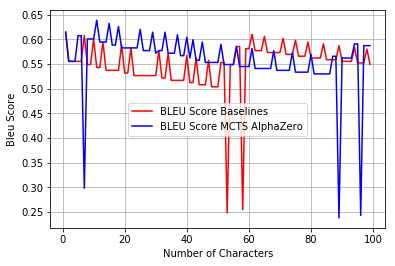

In [22]:
# red dashes, blue squares and green triangles
plt.xlabel('Number of Characters')
plt.ylabel('Bleu Score')
plt.grid(True)
plt.plot(range(1,100),scores_LSTM, color='red', linewidth=1.5, linestyle='-', label='BLEU Score Baselines')
plt.plot(range(1,100),scores_MCTS, color='blue', linewidth=1.5, linestyle='-', label='BLEU Score MCTS AlphaZero')
plt.legend()
plt.savefig('results.pdf')
plt.show()
